In [1]:
# The Stanard Hodgepodge of Imports for Python
import qutip as qt
import qutip.states as qts
import qutip.operators as qto
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import seaborn as sns
from functools import reduce
from functools import partial
from scipy.stats import entropy as entropy
import networkx as nx
import numpy as np
from timeit import default_timer as timer

sys.path.append("../dwaveutils/dwavetools")
sys.path.append("../dwaveutils/probrep")
from dictrep import DictRep
from dwavetools import (nqubit_1pauli, nqubit_2pauli, loadAandB, dict_to_qutip,
                       make_numeric_schedule, get_numeric_H, time_interpolation,
                       gs_calculator, random_partition, KL_div, ml_measurement)

[0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762, 0.04761904761904762]
21


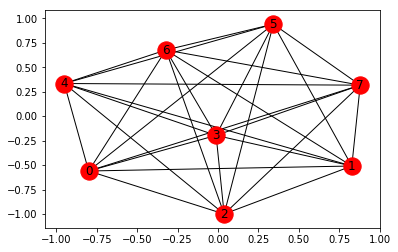

In [2]:
# First, let's create a sample 4 qubit Hamiltonian no h bias
dictH = {(0, 0): 1, (1, 1): 1, (2, 2): 1, (3, 3): -1, (4,4): 1, (5, 5): 1, (6, 6): 1, (7, 7):-1,\
         (0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (5, 6): 1, (6, 7): 1, (0, 7): 1,\
         (0, 2): 1, (0, 3): 1, (0, 4): 1, (0, 5): 1, (0, 6): 1,\
         (1, 3): 1, (1, 4): 1, (1, 5): 1, (1, 6): 1, (1, 7): 1,\
         (2, 4): 1, (2, 5): 1, (2, 6): 1, (2, 7): 1,\
         (3, 5): 1, (3, 6): 1, (3, 7): 1,\
         (4, 6): 1, (4, 7): 1,\
         (5, 7): 1}
H = DictRep(H = dictH, qpu = 'numerical', vartype = 'ising', encoding = 'logical')
graph = H.visualize_graph()
nonzero_entries = [x for x in  H.diag_H() if x != 0]
print(nonzero_entries)
print(len(nonzero_entries))

In [20]:
# set-up the problem
T = 1
s = 0.5
ftr = 0.5
num_runs = 400

# time this as well
start = timer()
# run many instances of the problem with a random partition each time
for i in range(num_runs):
    results = H.frem_comparison(T, s, ftr)
end = timer()
elapsed_time = (end - start)
print("{} runs takes {} seconds to run".format(num_runs, elapsed_time))

# finally, save the data just in case things crash or something
data = H.data
data.to_csv('8qubitdata.csv', index=False)

# analyze the data

# get averages of KL divergence
fKL_avg = data.loc[data['method'] == 'forward']['KL_div'].mean()
print("Average KL divergence of forward annealing over {} runs is {}".format(num_runs, fKL_avg))
rKL_avg = data.loc[data['method'] == 'reverse']['KL_div'].mean()
print("Average KL divergence of reverse annealing over {} runs is {}".format(num_runs, rKL_avg))
fremKL_avg = data.loc[data['method'] == 'frem']['KL_div'].mean()
print("Average KL divergence of frem annealing over {} runs is {}".format(num_runs, fremKL_avg))

# get minimum values
fKL_min = data.loc[data['method'] == 'forward']['KL_div'].min()
print("Minimum KL divergence of forward annealing over {} runs is {}".format(num_runs, fKL_min))
rKL_min = data.loc[data['method'] == 'reverse']['KL_div'].min()
print("Minimum KL divergence of reverse annealing over {} runs is {}".format(num_runs, rKL_min))
fremKL_min = data.loc[data['method'] == 'frem']['KL_div'].min()
print("Minimum KL divergence of frem annealing over {} runs is {}".format(num_runs, fremKL_min))

400 runs takes 8157.748520283996 seconds to run
Average KL divergence of forward annealing over 400 runs is 0.6903661480980298
Average KL divergence of reverse annealing over 400 runs is 6.217599736113029
Average KL divergence of frem annealing over 400 runs is 1.762128118987803
Minimum KL divergence of forward annealing over 400 runs is 0.6903661480980298
Minimum KL divergence of reverse annealing over 400 runs is 6.217599736113029
Minimum KL divergence of frem annealing over 400 runs is 0.3325714524978046


In [5]:
data = pd.read_csv('8qubitdata.csv')

In [39]:
data.loc[data['method'] == 'frem'].sort_values('KL_div')

,KL_div,T,ftr,method,part_size,probs,s
1004,0.332571,1.0,0.5,frem,2.0,[6.81343238e-06 4.92780751e-06 7.73484553e-05 ...,0.5
206,0.511585,1.0,0.5,frem,1.0,[1.09687892e-05 1.26559152e-02 3.16546223e-05 ...,0.5
881,0.511585,1.0,0.5,frem,1.0,[1.09687892e-05 1.26559152e-02 3.16546223e-05 ...,0.5
1088,0.566939,1.0,0.5,frem,1.0,[7.84268588e-06 3.08688907e-03 9.63573996e-06 ...,0.5
641,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 1.19713875e-05 9.55736957e-06 ...,0.5
818,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 1.19713875e-05 9.55736957e-06 ...,0.5
356,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 1.19713875e-05 9.55736957e-06 ...,0.5
590,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 2.86461427e-05 9.55736957e-06 ...,0.5
599,0.694181,1.0,0.5,frem,7.0,[6.65313276e-12 1.00748822e-09 1.04595445e-08 ...,0.5
623,0.702763,1.0,0.5,frem,1.0,[1.19163056e-07 4.49177033e-06 1.98862656e-07 ...,0.5


In [36]:
data.loc[data['method'] == 'frem'][data['KL_div'] < .69]

/home/nic/miniconda2/envs/jupyterlab3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,KL_div,T,ftr,method,part_size,probs,s
206,0.511585,1.0,0.5,frem,1.0,[1.09687892e-05 1.26559152e-02 3.16546223e-05 ...,0.5
356,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 1.19713875e-05 9.55736957e-06 ...,0.5
590,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 2.86461427e-05 9.55736957e-06 ...,0.5
641,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 1.19713875e-05 9.55736957e-06 ...,0.5
818,0.588490,1.0,0.5,frem,1.0,[6.90551609e-07 1.19713875e-05 9.55736957e-06 ...,0.5
881,0.511585,1.0,0.5,frem,1.0,[1.09687892e-05 1.26559152e-02 3.16546223e-05 ...,0.5
1004,0.332571,1.0,0.5,frem,2.0,[6.81343238e-06 4.92780751e-06 7.73484553e-05 ...,0.5
1088,0.566939,1.0,0.5,frem,1.0,[7.84268588e-06 3.08688907e-03 9.63573996e-06 ...,0.5
